In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Bigmartsales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
mean = df['Item_Weight'].mean()
df['Item_Weight'] = df['Item_Weight'].fillna(mean)
mode = df['Outlet_Size'].mode()[0]
df['Outlet_Size'] = df['Outlet_Size'].fillna(mode)

<Axes: title={'center': 'Outlet Loc vs Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

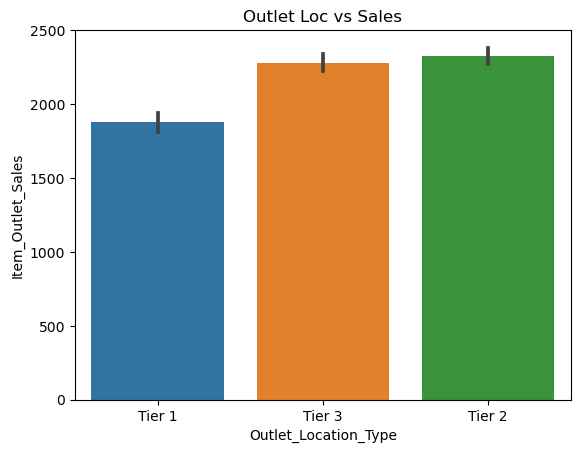

In [8]:
plt.title('Outlet Loc vs Sales')
sns.barplot(data=df,x= 'Outlet_Location_Type',y='Item_Outlet_Sales')

<Axes: title={'center': 'Outlet Type vs Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

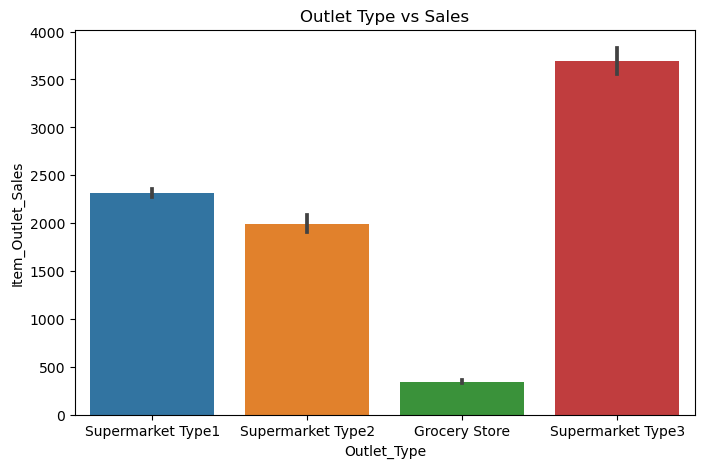

In [9]:
plt.figure(figsize=(8,5))
plt.title('Outlet Type vs Sales')
sns.barplot(data=df,x= 'Outlet_Type',y='Item_Outlet_Sales')

<Axes: title={'center': 'Item type vs Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

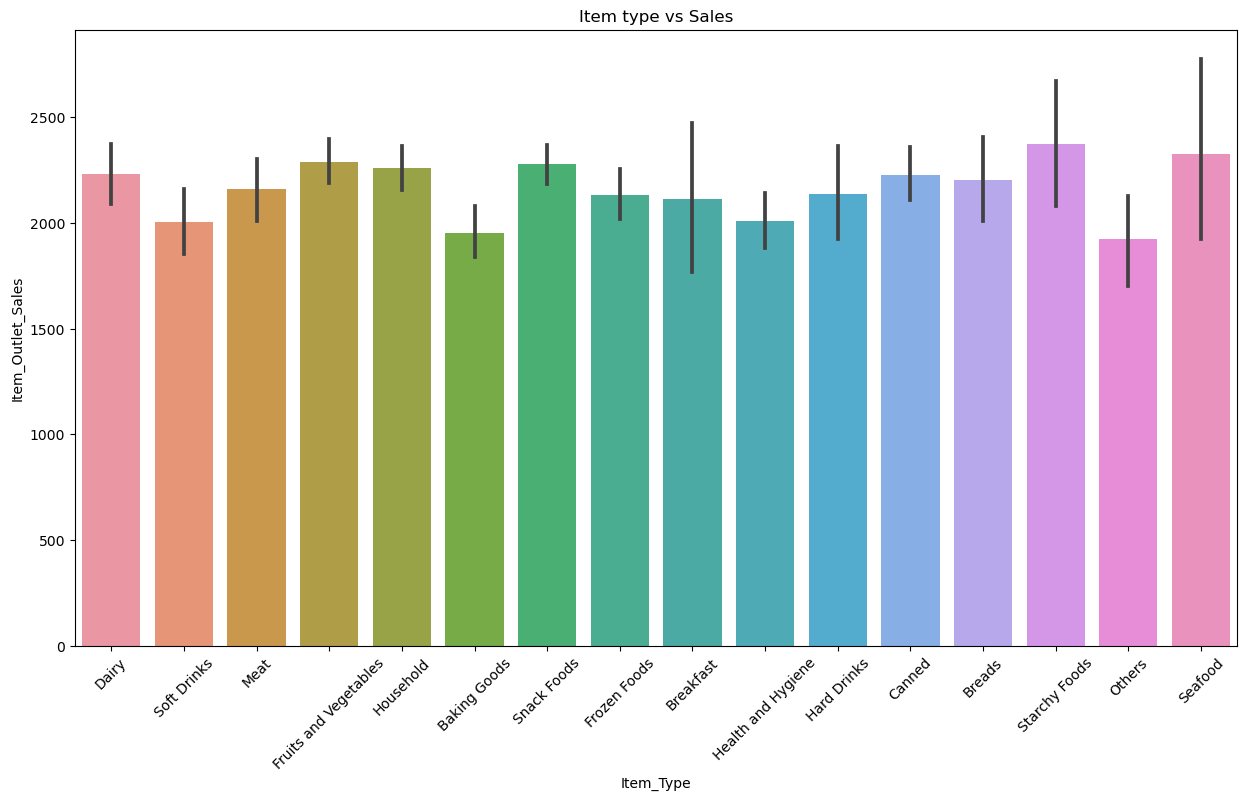

In [10]:
plt.figure(figsize=(15,8))
plt.title('Item type vs Sales')
plt.xticks(rotation=45)
sns.barplot(data=df,x= 'Item_Type',y='Item_Outlet_Sales')

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

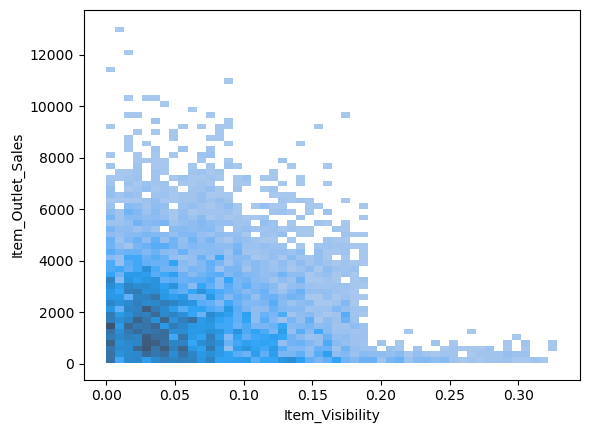

In [11]:
sns.histplot(data=df,x='Item_Visibility',y='Item_Outlet_Sales')

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

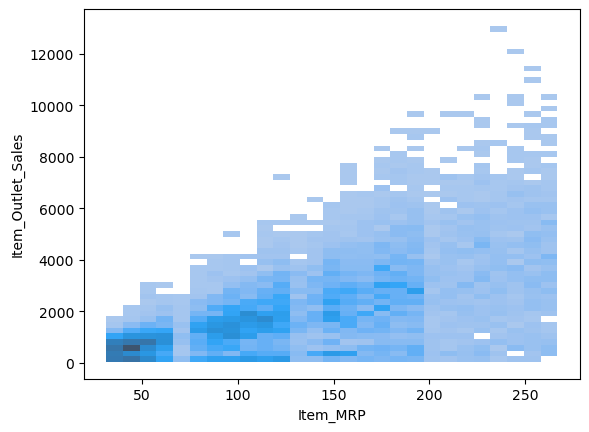

In [12]:
sns.histplot(data=df,x='Item_MRP',y='Item_Outlet_Sales')

In [13]:
df.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
colms = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']
le = LabelEncoder()
for cols in colms:
    df[cols] = le.fit_transform(df[cols])


In [15]:
df = pd.get_dummies(df, columns=['Item_Type'],drop_first=True)

In [16]:
plt.figure(figsize=(15,10))
corr = df.corr()
target_corr = corr['Item_Outlet_Sales'].sort_values(ascending=False)
print(target_corr)

Item_Outlet_Sales                  1.000000
Item_MRP                           0.567574
Outlet_Type                        0.401522
Outlet_Location_Type               0.089367
Item_Type_Fruits and Vegetables    0.025950
Item_Type_Snack Foods              0.022782
Item_Type_Household                0.015701
Item_Type_Starchy Foods            0.015039
Item_Weight                        0.011550
Item_Fat_Content                   0.009800
Item_Type_Dairy                    0.008858
Item_Type_Canned                   0.007387
Item_Type_Seafood                  0.007380
Item_Type_Breads                   0.002332
Item_Type_Meat                    -0.002995
Item_Type_Hard Drinks             -0.003956
Item_Type_Breakfast               -0.004656
Item_Type_Frozen Foods            -0.009482
Item_Type_Others                  -0.021267
Item_Type_Soft Drinks             -0.024040
Item_Type_Health and Hygiene      -0.025587
Outlet_Establishment_Year         -0.049135
Outlet_Size                     

<Figure size 1500x1000 with 0 Axes>

In [17]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,1,0.016047,249.8092,1999,1,0,1,3735.1380,False,...,False,False,False,False,False,False,False,False,False,False
1,5.92,2,0.019278,48.2692,2009,1,2,2,443.4228,False,...,False,False,False,False,False,False,False,False,True,False
2,17.50,1,0.016760,141.6180,1999,1,0,1,2097.2700,False,...,False,False,False,False,True,False,False,False,False,False
3,19.20,2,0.000000,182.0950,1998,1,2,0,732.3800,False,...,True,False,False,False,False,False,False,False,False,False
4,8.93,1,0.000000,53.8614,1987,0,2,1,994.7052,False,...,False,False,False,True,False,False,False,False,False,False


In [18]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

def train(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    
    pred = model.predict(X_test_scaled)
    
    cv_score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    
    print('Model:', model)
    print('-----------------------------')
    print('CV SCORE:', cv_score)
    print('MSE:', mse)
    print('r2 score:', r2)
    print('\n')
    
    return y_test, pred

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]
for mdl in models:
    y_test, pred = train(mdl, X, y)

Model: LinearRegression()
-----------------------------
CV SCORE: 1444921.6093340104
MSE: 1438984.6347332138
r2 score: 0.5031015504823226


Model: DecisionTreeRegressor()
-----------------------------
CV SCORE: 2431297.0795593844
MSE: 2318386.190506319
r2 score: 0.19943377042426558


Model: RandomForestRegressor()
-----------------------------
CV SCORE: 1310087.1773070148
MSE: 1293157.3905221592
r2 score: 0.5534574262831389


Model: ExtraTreesRegressor()
-----------------------------
CV SCORE: 1429400.3099465233
MSE: 1456243.28882967
r2 score: 0.4971419326696689


Model: GradientBoostingRegressor()
-----------------------------
CV SCORE: 1181408.101500835
MSE: 1162303.7342868254
r2 score: 0.5986427446858691


